In [23]:
import torch 
from torch import nn, optim
from torch.autograd.variable import Variable
from torchvision import transforms, datasets
import numpy as np 
import matplotlib.pyplot as plt

In [6]:
dim = 28

class GeneratorNet(torch.nn.Module):
    
    def __init__(self, pretrained=False):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = dim*dim
        self.pre = pretrained
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x
    
# Noise
def noise(size):
    n = Variable(torch.randn(size, 100))
    if torch.cuda.is_available(): return n.cuda() 
    return n

In [17]:
generator = GeneratorNet()

if torch.cuda.is_available():
    generator.cuda()

In [20]:
generator.load_state_dict(torch.load('model/gen.model', map_location='cpu'))
generator.eval()

GeneratorNet(
  (hidden0): Sequential(
    (0): Linear(in_features=100, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden1): Sequential(
    (0): Linear(in_features=256, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (hidden2): Sequential(
    (0): Linear(in_features=512, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
  )
  (out): Sequential(
    (0): Linear(in_features=1024, out_features=784, bias=True)
    (1): Tanh()
  )
)

In [21]:
!mkdir dataset

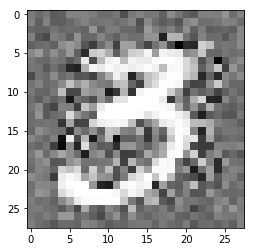

In [25]:
n_imgs = 10
count = 1

imgs = generator(noise(n_imgs)).cpu()
path = 'dataset/'

for f in imgs:
    #f = fake.detach().numpy()
    filename = path + 'img' + str(count) + ".png"
    
    img_ = f.reshape(28,28).detach().numpy()
    img = plt.imshow(img_, cmap='gray')
    plt.imsave(filename, img_, cmap='gray')
    #plt.show()
    
    count += 1